In [3]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
import math as m

In [379]:
from IPython.display import HTML

iframe_width = 640
height = 360
src = "https://www.youtube.com" + "/embed" + "/tK7U827jRGg" + "?rel=0&amp;controls=0&amp;showinfo=0"
frameborder = 0

arguments = (iframe_width, height, src, frameborder)

display(HTML('<iframe width={} height={} src={} frameborder={} allowfullscreen></iframe>'.format(*arguments)))

**c)**
Verwenden Sie den Differenzenquotienten $D_h v(x_j)$, um ein Eigenwertproblem der Form $A \textbf{v} = \lambda \textbf{v}$ mit einer Matrix $A \in \mathbb{R}^{(n-1) \times (n-1)}$ zu dem Eigenvektor $\textbf{v} := (v(x_1), \ldots, v(x_{n-1}))^T$ und dem Eigenwert $\lambda := \kappa^2$ herzuleiten. Lösen Sie dieses Eigenwertproblem mit *numpy.linalg.eig* und vergleichen Sie die Eigenwerte und Eigenvektoren mit den analytischen Ergebnissen aus (a). Untersuchen Sie auch die Konvergenz der numerisch berechneten Eigenwerte abhängig von $h$.

In [3]:
def my_numpy_matrix(n):

    assert n >= 2

    h = 1/n

    a = -2 * np.ones(n-1)
    b = np.ones(n-2)

    A = np.diag(b, -1) + np.diag(a, 0) + np.diag(b, 1)
    A = -A/h**2

    return A

# ---------------------------------------------------------------- #

n = 4
A = my_numpy_matrix(n)

#print(A)

In [225]:
def get_sorted_eigen_pairs(M):

    values, vectors = np.linalg.eig(M)

    values  = np.array(values)
    vectors = np.array(vectors)
    vectors = np.transpose(vectors)

    n = len(values)

    pairs = np.zeros(n, dtype = [('eigen_value', 'f8'),
                                 ('eigen_vector', 'f8', (n))])

    pairs['eigen_value'] = values
    pairs['eigen_vector'] = vectors

    indices = np.argsort(pairs, order = ['eigen_value'])
    pairs   = pairs[indices]

    return pairs

def get_sorted_eigen_values_and_vectors(M):

    pairs = get_sorted_eigen_pairs(M)

    values  = []
    vectors = []

    for pair in pairs:
        values  += [pair[0]]
        vectors += [pair[1]]

    values  = np.array(values)
    vectors = np.array(vectors)

    return values, vectors

def get_sorted_eigen_values(M):
    return get_sorted_eigen_values_and_vectors(M)[0]

def get_sorted_eigen_vectors(M):
    return get_sorted_eigen_values_and_vectors(M)[1]

# ---------------------------------------------------------------- #

def test(n):

    A = my_numpy_matrix(n)

    values  = get_sorted_eigen_values(A)
    vectors = get_sorted_eigen_vectors(A)

    print("sorted eigen values: ")
    print(values, "\n")
    print("sorted eigen vectors:")
    print(vectors, "\n")

    for value, vector in zip(values, vectors):

        a = value * vector
        print("value * vector:")
        print(a, "\n")

        b = A @ vector
        print("A @ vector:")
        print(b, "\n")

        print("same:")
        print(abs(b-a) < 1e-9, "\n")

n = 5

#test(n)

In [218]:
def show_eigen_infos(M, i_max, **kwargs):

    blacklist = []

    if 'blacklist' in kwargs.keys():
        blacklist += kwargs['blacklist']

    data = []

    if not 'matrix' in blacklist:
        data += ["Matrix:"]
        data += [np.array2string(M)]
        data += [""]

    values, vectors = get_sorted_eigen_values_and_vectors(M)
    values  = values [:i_max:]
    vectors = vectors[:i_max:]
    pairs   = zip(values, vectors)

    if not 'eigen_pairs' in blacklist:
        data += ["Eigen-Paare:"]
        data += ["(" + str(value) + "\n" + str(vector) + ")" for value, vector in pairs]
        data += [""]

    if not 'eigen_values' in blacklist:
        data += ["Eigen-Werte:"]
        data += [str(value) for value in values]
        data += [""]

    if not 'eigen_vectors' in blacklist:
        data += ["Eigen-Vektoren:"]
        data += [str(vector) for vector in vectors]
        data += [""]

    return data

In [375]:
def show_my_eigen_info(n_min, n_max, i_max, *args, **kwargs):

    assert 2 <= n_min <= n_max

    # will be filled with data ... who could have guessed?
    data = []

    # iterate over matrix sizes
    for n in range(n_min, n_max+1):

        # put header into data
        data += ["n = {}:".format(n)]
        data += ["------" + "-" * int(np.log10(n))]
        data += [""]

        # get matrix
        A = my_numpy_matrix(n)

        # or matrices
        # put data into data
        if 'blacklist' in kwargs.keys():
            data += show_eigen_infos(A, i_max, blacklist = kwargs['blacklist'])
        else:
            data += show_eigen_infos(A, i_max)

    # join data array to data string
    data = "\n".join(data)

    # save me

    file_path = 'data/'
    file_name = 'get_my_eigen_info(n_min = {}, n_max = {}, i_max = {})'.format(n_min, n_max, i_max)

    with open(file_path + file_name + '.txt', 'w') as file:
        file.write(data)

    # show time
    print(data)

# ---------------------------------------------------------------- #

n_min = 2
n_max = n_min + 8
i_max = n_max

blacklist = ['matrix', 'eigen_pairs', 'eigen_vectors']

#show_my_eigen_info(n_min, n_max, i_max, blacklist = blacklist)

In [370]:
def show_my_eigen_limits(i_max):

    # will be filled with data ... who could have guessed?
    data = []

    # put data into data
    data += ["n -> inf:"]
    data += ["---------"]
    data += [""]
    data += ["({} * pi)^2 = ".format(j) + str((j * np.pi)**2) for j in range(1, i_max+1)]

    # join data array to data string
    data = "\n".join(data)

    # save me

    file_path = 'data/'
    file_name = 'show_my_eigen_limits(i_max = {})'.format(i_max)

    with open(file_path + file_name + '.txt', 'w') as file:
        file.write(data)

    # show time
    print(data)

# ---------------------------------------------------------------- #

i_max = 4

show_my_eigen_limits(i_max)

n -> inf:
---------

(1 * pi)^2 = 9.869604401089358
(2 * pi)^2 = 39.47841760435743
(3 * pi)^2 = 88.82643960980423
(4 * pi)^2 = 157.91367041742973


In [425]:
def get_my_eigen_value_matrix(n_max):

    assert 2 <= n_max

    eigen_value_matrix = []

    for n in range(2, n_max+1):

        A = my_numpy_matrix(n)

        eigen_values = get_sorted_eigen_values(A)
        eigen_values = np.ndarray.tolist(eigen_values)

        eigen_value_matrix += [eigen_values + [0] * (n_max-n)]

    eigen_value_matrix = np.array(eigen_value_matrix)
    eigen_value_matrix = np.transpose(eigen_value_matrix)

    return eigen_value_matrix

def show_my_eigen_value_matrix(n_max, i_max):

    # get data frame
    my_eigen_value_matrix    = get_my_eigen_value_matrix(n_max)
    my_eigen_value_DataFrame = pd.DataFrame(my_eigen_value_matrix)

    # rename x- and y-axis
    my_eigen_value_DataFrame.columns = [n for n in range(2, n_max+1)]
    my_eigen_value_DataFrame.index   = range(1, n_max)

    # replace 0 with nan
    my_eigen_value_DataFrame = my_eigen_value_DataFrame.replace(0, np.nan)

    # crop data frame
    my_eigen_value_DataFrame = my_eigen_value_DataFrame[:i_max]

    # save me

    file_path = 'data/'
    file_name = 'show_my_eigen_value_matrix(n_max = {}, i_max = {})'.format(n_max, i_max)

    with open(file_path + file_name + '.tex', 'w') as file:
        file.write(my_eigen_value_DataFrame.to_latex())

    # show time
    display(my_eigen_value_DataFrame)

# ---------------------------------------------------------------- #

n_max = 10
i_max = 3

show_my_eigen_value_matrix(n_max, i_max)

,2,3,4,5,6,7,8,9,10
1,8.0,9.0,9.372583,9.54915,9.646171,9.705051,9.743420,9.769795,9.788697
2,NaN,27.0,32.000000,34.54915,36.000000,36.897999,37.490332,37.900800,38.196601
3,NaN,NaN,54.627417,65.45085,72.000000,76.192948,79.016521,81.000000,82.442950


In [450]:
def get_my_eigen_limit(i):
    return (i * np.pi)**2

def get_my_eigen_limit_matrix(n_max):

    eigen_limit_matrix = []

    for i in range(1, n_max):
        eigen_limit_matrix += [[get_my_eigen_limit(i)] * (n_max-1)]

    eigen_limit_matrix = np.triu(eigen_limit_matrix)

    return eigen_limit_matrix

# ---------------------------------------------------------------- #

def test(n_max):
    eigen_limit_matrix = get_my_eigen_limit_matrix(n_max)
    df = pd.DataFrame(eigen_limit_matrix)
    print(df)

n_max = 6

#test(n_max)

In [448]:
def get_my_eigen_error_matrix(n_max):

    eigen_value_matrix = get_my_eigen_value_matrix(n_max)
    eigen_limit_matrix = get_my_eigen_limit_matrix(n_max)
    eigen_error_matrix = abs(eigen_limit_matrix - eigen_value_matrix)

    return eigen_error_matrix

# ---------------------------------------------------------------- #

def test(n_max):
    eigen_error_matrix = get_my_eigen_error_matrix(n_max)
    df = pd.DataFrame(eigen_error_matrix)
    print(df)

n_max = 6

#test(n_max)

n_max = 16
i_max = 3


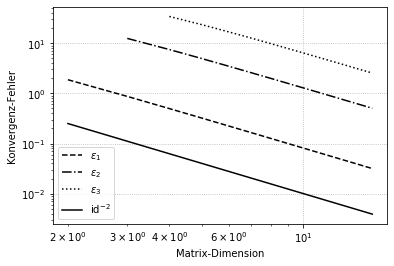

In [430]:
# linestyles ..... of eigen value plots

def plot_eigen_value_errors(n_max, i_max):

    # A_n only has n-1 eigen values/vectors
    assert i_max < n_max

    # get matrix
    eigen_error_matrix = get_my_eigen_error_matrix(n_max)

    # matrix types
    x = np.array(range(2, n_max+1))
    # upper triangular matrix of eigen value errors times eigen value instances
    y = eigen_error_matrix[:i_max:]

    # mandatory for adding labels
    fig, ax = plt.subplots()

    # separate graphs via linestyles instead of colours
    linestyles = ['--', '-.', ':']

    # do actual plotting
    for l in range(i_max):
        l_ = l % len(linestyles)
        plt.loglog(x[l::], y[l][l::], linestyles[l_], color = 'black')

    # add reference
    plt.loglog(x, 1/x**2, color = 'black')

    # add legend

    legend = []

    legend += ["$\epsilon_{}$".format(j) for j in range(1, i_max+1)]
    legend += ["id$^{{-2}}$"]

    plt.legend((*legend,))

    # add labels
    ax.set_xlabel("Matrix-Dimension")
    ax.set_ylabel("Konvergenz-Fehler")

    # add grid
    plt.grid(linestyle = ':')
 
    # save me
    file_path = 'images/'
    file_name = 'plot_eigen_value_errors(n_max = {}, i_max = {})'.format(n_max, i_max)
    plt.savefig(file_path + file_name + '.png')

    # showtime
    plt.show()

# ---------------------------------------------------------------- #

n_max = 16
i_max = 3

print("n_max =", n_max)
print("i_max =", i_max)

plot_eigen_value_errors(n_max, i_max)

In [527]:
def get_plot_pair_from_eigen_vector(eigen_vector):

    # normalize length
    eigen_vector = eigen_vector/np.amax(abs(eigen_vector))
    # normalize orientation
    eigen_vector = eigen_vector * np.sign(eigen_vector[0])

    n = len(eigen_vector)+1

    # get partition of [0, 1]
    x = np.linspace(0, 1, n+1)
    # get eigen vector with boundary condition
    y = np.concatenate(([0], eigen_vector, [0]))

    return x, y

# ---------------------------------------------------------------- #

def test(x_max):

    dummy_vector = []

    dummy_vector += [x for x in range(1, x_max)]
    dummy_vector += [x_max]
    dummy_vector += [x_max-x for x in range(1, x_max)]

    dummy_vector = np.array(dummy_vector)

    print("dummy_vector =", dummy_vector, "\n")

    x, y = eigen_vector_plot_pair(dummy_vector)

    print("x =", x)
    print("y =", y)

x_max = 2

#test(x_max)

In [169]:
# i ... which eigen vector to plot

def plot_eigen_vector(n, i):

    # there are n_max-1 eigen values/vectors at max
    assert i < n

    # get matrix
    A = my_numpy_matrix(n)

    # get sorted eigen vectors
    eigen_vectors = sorted_eigen_vectors(A)

    # which eigen vector to plot
    eigen_vector = eigen_vectors[i-1]

    # get plot pair from eigen vector
    x, y = get_plot_pair_from_eigen_vector(eigen_vector)

    # mandatory for adding labels
    fig, ax = plt.subplots()

    # do actual plotting
    plt.plot(x, y, color = 'black')

    # add labels
    ax.set_xlabel("Partitionierung")
    ax.set_ylabel("Eigenvektor mit Randbedingungen")

    # add grid
    plt.grid(linestyle = ':')
 
    # save me
    file_path = 'images/'
    file_name = 'plot_eigen_vector(n = {}, i = {})'.format(n, i)
    plt.savefig(file_path + file_name + '.png')

    # showtime
    plt.show()

# ---------------------------------------------------------------- #

def foo(n_max, i_max):
    for i in range(1, i_max+1):
        for n in range(i+1, n_max+1):
            if m.log(n, 2).is_integer():
                print("i =", i)
                print("n =", n)
                plot_eigen_vector(n, i)

n_max = 128
i_max = 4

#foo(n_max, i_max)

In [4]:
def plot_eigen_vectors(n_array, i):

    # there are n_max-1 eigen values/vectors at max
    assert i < min(n_array)

    # mandatory for adding labels
    fig, ax = plt.subplots()

    # separate graphs via linestyles instead of colours
    linestyles = [':', '-.', '--', '-']

    for l, n in enumerate(n_array):

        # get matrix
        A = my_numpy_matrix(n)

        # get sorted eigen vectors
        eigen_vectors = sorted_eigen_vectors(A)

        # which eigen vectors to plot
        eigen_vector = eigen_vectors[i-1]

        # get plot pair from eigen vector
        x, y = get_plot_pair_from_eigen_vector(eigen_vector)

        l_ = l % len(linestyles)

        # do actual plotting
        plt.plot(x, y, linestyles[l_], color = 'black', linewidth = 1)

    # add legend
    legend = ["$v^{{({}, {})}}$".format(i, n) for n in n_array]
    plt.legend((*legend,))

    # add labels
    ax.set_xlabel("Partitionierung")
    ax.set_ylabel("Eigenvektor mit Randbedingungen")

    # add grid
    plt.grid(linestyle = ':')
 
    # save me
    file_path = 'images/' + 'plot_eigen_vectors/'
    file_name = 'plot_eigen_vectors(n_array = {}, i = {})'.format(n_array, i)
    plt.savefig(file_path + file_name + '.png')

    # showtime
    plt.show()

# ---------------------------------------------------------------- #

def foo(i_max):

    for i in range(1, i_max+1):

        p_min = np.log2(i+1)
        p_min = np.ceil(p_min)
        p_min = int(p_min)
        n_array = [2**(p_min + p_add) for p_add in range(4)]

        print("n_array =", n_array)
        print("i =", i)

        plot_eigen_vectors(n_array, i)

i_max = 8

foo(i_max)

n_array = [2, 4, 8, 16]
i = 1
n_array = [4, 8, 16, 32]
i = 2
n_array = [4, 8, 16, 32]
i = 3
n_array = [8, 16, 32, 64]
i = 4
n_array = [8, 16, 32, 64]
i = 5
n_array = [8, 16, 32, 64]
i = 6
n_array = [8, 16, 32, 64]
i = 7
n_array = [16, 32, 64, 128]
i = 8


**d)**
Die Ausbreitungsgeschwindigkeit $c$ in (3) hängt vom Material der Saite ab. Bisher haben wir sie als konstant angenommen, d.h. die Saite bestand aus einem Material. Sei nun für $c_0, c_1 \in \mathbb{R}$

$$c(x) :=
\begin{cases}
c_0, & x \in (0, 1/2) \\
c_1, & x \in (1/2, 1)
\end{cases}.$$

Leiten Sie eine zu (4) ähnliche Gleichung her und geben Sie einen (6) entsprechenden Lösungsansatz an, wenn die Lösung $v$ auf $(0, 1)$ statig differenzierbar sein soll.

In [10]:
# c ... pair of propagation speeds

def get_zero_function(c):

    # allocate some sympy symbols:
    omega = sp.Symbol('\omega')
    kappa = sp.IndexedBase('\kappa')

    # implement the matrix R (properly):
    R = sp.Matrix([[ sp.sin(kappa[0]/2),  kappa[0]*sp.cos(kappa[0]/2), 0               ],
                   [-sp.cos(kappa[1]/2),  kappa[1]*sp.sin(kappa[1]/2), sp.cos(kappa[1])],
                   [-sp.sin(kappa[1]/2), -kappa[1]*sp.cos(kappa[1]/2), sp.sin(kappa[1])]])
    R = R.T

    # calculate R's determinant (properly):
    det = sp.det(R)
    det = sp.simplify(det)

    # substitute for kappa_0 and kappa_1:
    kappa_0 = omega/c[0]
    kappa_1 = omega/c[1]
    substitution = {kappa[0]: kappa_0, kappa[1]: kappa_1}
    det = det.subs(substitution)

    # transform expression det into proper numpy function:
    zero_function = sp.lambdify(omega, det, 'numpy')

    return zero_function

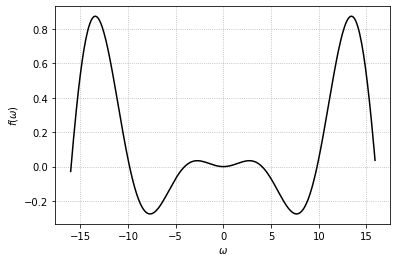

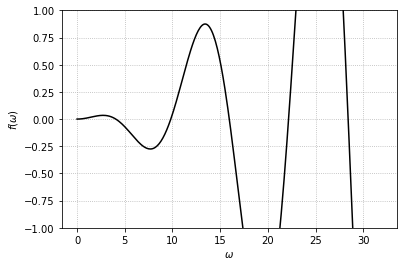

In [11]:
# interval ... where to plot
# limits ..... pair of boundaries for y-axis

def plot_omegas(c, interval, **kwargs):

    f = get_zero_function(c)
    a = interval[0]
    b = interval[1]
    dt = 0.1

    x = np.arange(a, b, dt)
    y = f(x)

    # mandatory for adding labels
    fig, ax = plt.subplots()

    # for file_name below
    limits = ""

    # zooming on y-axis is optional
    if 'limits' in kwargs.keys():
        limits = kwargs['limits']
        plt.ylim(*limits)
        limits = ", limits = {}".format(limits)

    # do actual plotting
    plt.plot(x, y, color = 'black')

    # add labels
    ax.set_xlabel("$\omega$")
    ax.set_ylabel("$f(\omega)$")

    # add grid
    plt.grid(linestyle = ":")

    # save me
    file_path = 'images/' + 'plot_omegas/'
    file_name = 'plot_omegas(c = {}, interval = {}'.format(c, interval) + limits + ')'
    plt.savefig(file_path + file_name + '.png')

    # show time
    plt.show()

# ---------------------------------------------------------------- #

c        = (100, 1)
interval = (-16, 16)

plot_omegas(c, interval)

limit = 1

interval = (0, 32)
limits   = (-limit, limit)

plot_omegas(c, interval, limits = limits)

In [414]:
from scipy.optimize import fsolve

# guesses ... array of guesses for omega to start iteration

def show_omegas(c, guesses, tol):

    f = get_zero_function(c)

    # will be filled with data ... who could have guessed?
    omegas = []

    for guess in guesses:
        solutions = fsolve(f, guess, xtol = tol)
        omegas += [solutions[0]]

    # convert to numpy array
    omegas = np.array(omegas)

    # convert to pandas data frame
    df = pd.DataFrame([guesses, omegas, omegas**2])

    # rename x- and y-axis
    df.columns = range(1, len(guesses)+1)
    df.index   = ["$\tilde \omega$", "$\omega$", "$\omega^2$"]

    # save me

    file_path = 'data/'
    file_name = 'find_omegas(c = {}, guesses = {}, tol = {})'.format(c, guesses, tol)

    with open(file_path + file_name + '.tex', 'w') as file:
        file.write(df.to_latex(escape = False))

    # show time
    display(df)

# ---------------------------------------------------------------- #

c       = (100, 1)
guesses = [5*n for n in range(1, 7)]
tol     = 1e-8

show_omegas(c, guesses, tol)

,1,2,3,4,5,6
$\tilde \omega$,5.000000,10.000000,15.000000,20.000000,25.000000,30.000000
$\omega$,4.057425,9.826058,15.956815,22.170349,15.956815,28.413934
$\omega^2$,16.462695,96.551423,254.619961,491.524375,254.619961,807.351663


**e)**
Verwenden Sie wie unter (c) den Differenzenquotienten $D_h v(x_j)$, um ein verallgemeinertes Eigenwertproblem der Form $A \textbf{v} = \lambda B \textbf{v}$ mit Matrizen $A, B \in \mathbb{R}^{(n-1) \times (n-1)}$ herzuleiten. Lösen Sie dieses Problem ebenfalls mit *numpy.linalg.eig* und plotten Sie die Eigenfunktionen. Erklären Sie die Ergebnisse.

In [205]:
def my_other_numpy_matrix_inverse(n, c):

    times = np.floor((n-1)/2)
    times = int(times)

    lower = [c[0]]*times
    upper = [c[1]]*times

    middle = [(c[0] + c[1])/2]

    if n%2 != 0:
        B_inverse = np.diag(lower + upper)**2
        return B_inverse
    else:
        B_inverse = np.diag(lower + middle + upper)**2
        return B_inverse

def my_other_numpy_matrix(n, c):
    return 1/my_other_numpy_matrix_inverse(n, c)

def my_general_numpy_matrix(n, c):

    A = my_numpy_matrix(n)
    B_inverse = my_other_numpy_matrix_inverse(n, c)
    B_inverse_A = B_inverse @ A

    return B_inverse_A

# ---------------------------------------------------------------- #

def test(n, c):

    B = my_other_numpy_matrix(n, c)
    B_inverse = my_other_matrix_inverse(n, c)

    print(B, "\n")
    print((2/(c[0] + c[1]))**2, "\n")

    print(B_inverse, "\n")
    print(((c[0] + c[1])/2)**2, "\n")

n = 5
c = (100, 1)

#test(n, c)

In [206]:
def get_my_eigen_info_general(n_min, n_max, i_max, c, **kwargs):

    # there are n_max-1 eigen values/vectors at max
    assert 2 <= n_min <= n_max

    # matrix B would not be regular
    assert c[0] != 0 and c[1] != 0

    # will be filled with data ... who could have guessed?
    data = []

    # iterate over matrix sizes
    for n in range(n_min, n_max+1):

        # put header into data
        data += ["n = {}:".format(n)]
        data += ["------" + "-" * int(np.log10(n))]
        data += [""]

        # get matrix
        B_inverse_A = my_general_numpy_matrix(n, c)

        # put data into data
        if 'blacklist' in kwargs.keys():
            data += get_eigen_infos(B_inverse_A, i_max, blacklist = kwargs['blacklist'])
        else:
            data += get_eigen_infos(B_inverse_A)

    # join data array to data string
    data = "\n".join(data)

    # save me

    file_path = 'data/'
    file_name = 'get_my_eigen_info_general(n_min = {}, n_max = {}, i_max = {}, c = {})'.format(n_min, n_max, i_max, c)

    with open(file_path + file_name + '.txt', 'w') as file:
        file.write(data)

    # show time
    print(data)

# ---------------------------------------------------------------- #

n_min = 1_000
n_max = n_min
i_max = 6
c     = (100, 1)

blacklist = ['matrix', 'eigen_pairs', 'eigen_vectors']

get_my_eigen_info_general(n_min, n_max, i_max, c, blacklist = blacklist)

n = 1000:
---------

Eigen-Werte:
16.484842467959282
96.72906752116168
255.1085267299781
492.4719773873576
808.8968311750169
1204.3889257773742



In [428]:
def get_my_eigen_value_matrix_general(n_max, c):

    assert 2 <= n_max

    eigen_value_matrix = []

    for n in range(2, n_max+1):

        # get matrix
        B_inverse_A = my_general_numpy_matrix(n, c)

        # get eigen values
        eigen_values = get_sorted_eigen_values(B_inverse_A)
        eigen_values = np.ndarray.tolist(eigen_values)

        # add eigen values to matrix
        eigen_value_matrix += [eigen_values + [0] * (n_max-n)]

    # convert to numpy array
    eigen_value_matrix = np.array(eigen_value_matrix)
    eigen_value_matrix = np.transpose(eigen_value_matrix)

    return eigen_value_matrix

def show_my_eigen_value_matrix_general(n_max, i_max, c):

    # get matrix
    my_eigen_value_matrix_general = get_my_eigen_value_matrix_general(n_max, c)

    # get data frame
    my_eigen_value_DataFrame_general = pd.DataFrame(my_eigen_value_matrix_general)

    # rename x- and y-axis
    my_eigen_value_DataFrame_general.columns = [n for n in range(2, n_max+1)]
    my_eigen_value_DataFrame_general.index   = range(1, n_max)

    # replace 0 with nan
    my_eigen_value_DataFrame_general = my_eigen_value_DataFrame_general.replace(0, np.nan)

    # crop data frame
    my_eigen_value_DataFrame_general = my_eigen_value_DataFrame_general[:i_max]

    # save me

    file_path = 'data/'
    file_name = 'show_my_eigen_value_matrix_general(n_max = {}, i_max = {}, c = {})'.format(n_max, i_max, c)

    with open(file_path + file_name + '.tex', 'w') as file:
        file.write(my_eigen_value_DataFrame_general.to_latex())

    # show time
    display(my_eigen_value_DataFrame_general)

# ---------------------------------------------------------------- #

n_max = 6
i_max = 4
c     = (100, 1)

show_my_eigen_value_matrix_general(n_max, i_max, c)

,2,3,4,5,6
1,20402.0,13.499662,21.329378,15.313793,20.048572
2,NaN,180004.500338,56813.374144,68.017688,96.940091
3,NaN,NaN,344805.296478,250012.501563,102552.962302
4,NaN,NaN,NaN,750004.166956,422576.319931


In [463]:
from scipy.optimize import fsolve

def get_my_eigen_limit_matrix_general(n_max, c, tol):

    # zero points are omegas
    f = get_zero_function(c)

    # get matrix (for guessing)
    my_eigen_value_matrix_general = get_my_eigen_value_matrix_general(n_max, c)
    guess_matrix = np.sqrt(my_eigen_value_matrix_general)

    # allocate matrix (for storing solutions)
    shape = my_eigen_value_matrix_general.shape
    my_eigen_limit_matrix_general = np.zeros(shape)
    solution_matrix = my_eigen_limit_matrix_general

    for index, guess in np.ndenumerate(guess_matrix):
        solutions = fsolve(f, guess, xtol = tol)
        solution_matrix[index] = solutions[0]**2

    return my_eigen_limit_matrix_general

# ---------------------------------------------------------------- #

def test(n_max, c, tol):
    eigen_limit_matrix_general = get_my_eigen_limit_matrix_general(n_max, c, tol)
    df = pd.DataFrame(eigen_limit_matrix_general)
    print(df)

n_max = 6
c     = (100, 1)
tol   = 1e-8

test(n_max, c, tol)

              0              1              2              3             4
0  19992.568587      16.462695      16.462695      16.462695  1.646269e+01
1      0.000000  179863.145999   52599.263380      96.551423  9.655142e+01
2      0.000000       0.000000  345017.094501  249486.866957  9.673219e+04
3      0.000000       0.000000       0.000000  746403.145336  4.231358e+05
4      0.000000       0.000000       0.000000       0.000000  1.094407e+06


In [482]:
from scipy.optimize import fsolve

def get_my_eigen_error_matrix_general(n_max, c, tol):

    eigen_value_matrix_general = get_my_eigen_value_matrix_general(n_max, c)
    eigen_limit_matrix_general = get_my_eigen_limit_matrix_general(n_max, c, tol)
    eigen_error_matrix_general = abs(eigen_limit_matrix_general - eigen_value_matrix_general)

    return eigen_error_matrix_general

# ---------------------------------------------------------------- #

def test(n_max, c, tol):
    eigen_error_matrix_general = get_my_eigen_error_matrix_general(n_max, c, tol)
    df = pd.DataFrame(eigen_error_matrix_general)
    print(df)

n_max = 16
c     = (100, 1)
tol   = 1e-8

#test(n_max, c, tol)

n_max = 32
i_max = 3
c = (1, 1)


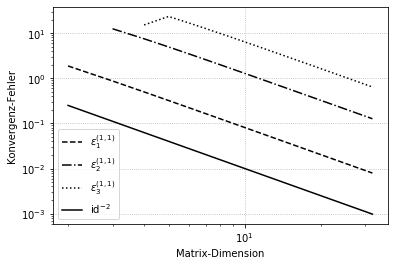

n_max = 32
i_max = 3
c = (1, 1.1)


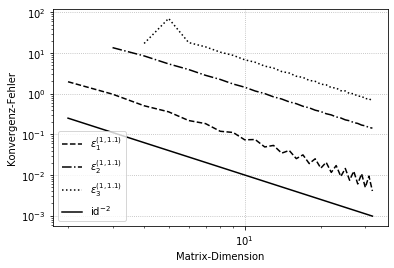

n_max = 32
i_max = 3
c = (1, 2)


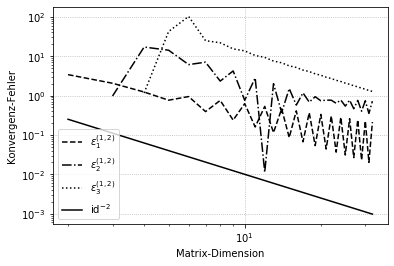

n_max = 32
i_max = 3
c = (1, 100)


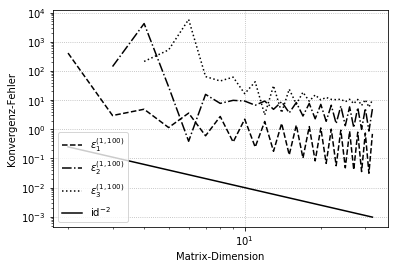

In [488]:
def plot_eigen_value_errors_general(n_max, i_max, c, tol):

    # A_n only has n-1 eigen values/vectors
    assert i_max < n_max

    # get matrix
    eigen_error_matrix_general = get_my_eigen_error_matrix_general(n_max, c, tol)

    # matrix types
    x = np.array(range(2, n_max+1))
    # upper triangular matrix of eigen value errors times eigen value instances
    y = eigen_error_matrix_general[:i_max:]

    # mandatory for adding labels
    fig, ax = plt.subplots()

    # separate graphs via linestyles instead of colours
    linestyles = ['--', '-.', ':']

    # do actual plotting
    for l in range(i_max):
        l_ = l % len(linestyles)
        plt.loglog(x[l::], y[l][l::], linestyles[l_], color = 'black')

    # add reference
    plt.loglog(x, 1/x**2, color = 'black')

    # add legend

    legend = []

    legend += ["$\epsilon_{}^{{{}}}$".format(j, c) for j in range(1, i_max+1)]
    legend += ["id$^{{-2}}$"]

    plt.legend((*legend,))

    # add labels
    ax.set_xlabel("Matrix-Dimension")
    ax.set_ylabel("Konvergenz-Fehler")

    # add grid
    plt.grid(linestyle = ':')
 
    # save me
    file_path = 'images/' + 'plot_eigen_value_errors_general/'
    file_name = 'plot_eigen_value_errors_general(n_max = {}, i_max = {}, c = {})'.format(n_max, i_max, c)
    plt.savefig(file_path + file_name + '.png')

    # showtime
    plt.show()

# ---------------------------------------------------------------- #

def foo(n_max, i_max, c_array, tol):
    for c in c_array:
        print("n_max =", n_max)
        print("i_max =", i_max)
        print("c =", c)
        plot_eigen_value_errors_general(n_max, i_max, c, tol)

n_max   = 32
i_max   = 3
c_array = [(1, 1), (1.1, 1), (2, 1), (100, 1)]
c_array = [(1, 1), (1, 1.1), (1, 2), (1, 100)]
tol     = 1e-16

foo(n_max, i_max, c_array, tol)

In [170]:
def plot_eigen_vector_general(n, i, c):

    # there are n_max-1 eigen values/vectors at max
    assert i < n

    # matrix B would not be regular
    assert c[0] != 0 and c[1] != 0

    # get matrix
    B_inverse_A = my_general_numpy_matrix(n, c)

    # get sorted eigen vectors
    eigen_vectors = sorted_eigen_vectors(B_inverse_A)

    # which eigen vector to plot
    eigen_vector = eigen_vectors[i-1]

    # get plot pair from eigen vector
    x, y = get_plot_pair_from_eigen_vector(eigen_vector)

    # mandatory for adding labels
    fig, ax = plt.subplots()

    # do actual plotting
    plt.plot(x, y, color = 'black')

    # add labels
    ax.set_xlabel("Partitionierung")
    ax.set_ylabel("Eigenvektor mit Randbedingungen")

    # add grid
    plt.grid(linestyle = ':')
 
    # save me
    file_path = 'images/'
    file_name = 'plot_eigen_vector_general(n = {}, i = {}, c = {})'.format(n, i, c)
    plt.savefig(file_path + file_name + '.png')

    # showtime
    plt.show()

# ---------------------------------------------------------------- #

def foo(n_max, i_max, c):
    for i in range(1, i_max+1):
        for n in range(i+1, n_max+1):
            if m.log(n, 2).is_integer():
                print("n =", n)
                print("i =", i)
                print("c =", c)
                plot_eigen_vector_general(n, i, c)

n_max = 128
i_max = 4
c = (6, 1)

#foo(n_max, i_max, c)

In [1]:
def plot_eigen_vectors_general(n_array, i, c):

    # there are n_max-1 eigen values/vectors at max
    assert i < min(n_array)

    # matrix B would not be regular
    assert c[0] != 0 and c[1] != 0

    # mandatory for adding labels
    fig, ax = plt.subplots()

    # separate graphs via linestyles instead of colours
    linestyles = [':', '-.', '--', '-']

    for l, n in enumerate(n_array):

        # get matrix
        B_inverse_A = my_general_numpy_matrix(n, c)

        # get sorted eigen vectors
        eigen_vectors = sorted_eigen_vectors(B_inverse_A)

        # which eigen vectors to plot
        eigen_vector = eigen_vectors[i-1]

        # get plot pair from eigen vector
        x, y = get_plot_pair_from_eigen_vector(eigen_vector)

        l_ = l % len(linestyles)

        # do actual plotting
        plt.plot(x, y, linestyles[l_], color = 'black', linewidth = 1)

    # add legend
    legend = ["$v^{{({}, {}), {}}}$".format(i, n, c) for n in n_array]
    plt.legend((*legend,))

    # add labels
    ax.set_xlabel("Partitionierung")
    ax.set_ylabel("Eigenvektor mit Randbedingungen")

    # add grid
    plt.grid(linestyle = ':')
 
    # save me
    file_path = 'images/' + 'plot_eigen_vectors_general/'
    file_name = 'plot_eigen_vectors_general(n_array = {}, i = {}, c = {})'.format(n_array, i, c)
    plt.savefig(file_path + file_name + '.png')

    # showtime
    plt.show()

# ---------------------------------------------------------------- #

def foo(c_max):

    i_max   = 2*c_max
    c_array = []

    for c_0 in range(1, c_max+1):

        for c_1 in range(1, c_max+1):

            c = (c_0, c_1)

            for i in range(1, i_max+1):

                p_min = np.log2(i+1)
                p_min = np.ceil(p_min)
                p_min = int(p_min)
                n_min = 2**p_min
                n_min = int(n_min)
                n_array = [n_min * 2**p for p in range(4)]

                print("n_array =", n_array)
                print("i =", i)
                print("c =", c)

                plot_eigen_vectors_general(n_array, i, c)

c_max = 4

#foo(c_max) # do not touch!!!

**f)**
Sei $\rho > 0$. Verwenden Sie die Vektor Iteration angewendet auf das Eigenwertproblem

$$ (A - \rho B)^{-1} B \tilde{\textbf{v}} = \mu \tilde{\textbf{v}} $$

mit den Matrizen $A$ und $B$ aus der vorigen Aufgabe. Welcher Zuasmmenhang besteht zwischen den Eigenpaaren $(\mu, \tilde{\textbf{v}})$ und den Eigenpaaren $(\lambda, \textbf{v})$ aus der vorigen Aufgabe?

In [16]:
def normalize(x):
    return x/np.linalg.norm(x)

# under construction:

from scipy.linalg import lu, solve_triangular

def vector_iteration(n, c, rho, tol):

    # some random (non zero) vector
    randy = np.random.rand(n-1)
    randy = normalize(randy)

    A = my_numpy_matrix(n)
    B = my_other_matrix(n, c)
    B_inverse = my_other_numpy_matrix_inverse(n, c)
    B_inverse_A = B_inverse@A

    # calculate lu-decomposition and apply permutation matrix
    M = A - rho*B
    L, U = lu(M, permute_l = True)

    # stop iteration when differences are small enough
    eigen_randy_old = -tol
    eigen_randy_new = tol

    while abs(eigen_randy_old - eigen_randy_new) > tol:

        # get eigen values of randy
        Matrix = np.linalg.inv(A - rho*B) @ B
        eigen_randy_old = np.dot(Matrix @ randy, randy)

        # apply first part of matrix to randy
        randy = B @ randy

        # solve L @ forwards = randy via forwards substitution
        forwards  = solve_triangular(L, randy,    lower = True)
        # solve U @ backwards = forwards per backwards substitution
        backwards = solve_triangular(U, forwards, lower = False)

        # apply second part of matrix to randy
        randy = backwards
        # normalize
        randy = normalize(randy)

        # get eigen values of randy
        Matrix = np.linalg.inv(A - rho*B) @ B
        eigen_randy_new = np.dot(Matrix @ randy, randy)

    # return eigen pair
    return (eigen_randy_new, randy)

# ---------------------------------------------------------------- #

n    = 5
c    = (100, 1)
rho_ = 100
tol  = 1e-10

mu_ = vector_iteration(n, c, rho_, tol)[0]

lambda_ = 1/mu_ + rho_
print("lambda =", lambda_)

lambda = 68.01768837320124
